# Handwritten Digit Recognition Using Neural Networks

## Abstract
This project is a tutorial of the foundational "Hello World" Handwritten Digit Classification guide, but with a focus on TMNIST datasets. The tutorial is designed to elucidate the nuances of neural network types conducive to TMNIST data, providing a comprehensive step-by-step walkthrough. It serves as a valuable resource for users delving into the intricacies of digit classification within the TMNIST context, offering insights and guidance throughout the learning process.

The model has an accuracy of 97.6 percent in predicting handwritten digits based on MNIST dataset. 

**Q: What is Neural Networks?**

A: Neural networks, in the context of artificial intelligence and machine learning, are computational models inspired by the human brain's structure and functioning. These networks consist of interconnected nodes, or artificial neurons, organized into layers. The fundamental building blocks are the input layer, hidden layers, and output layer.

Neural networks are trained on data through a process called supervised learning. During training, the network adjusts its parameters to recognize patterns and relationships within the data, enabling it to make predictions or classifications. The strength of neural networks lies in their ability to learn and generalize from complex, high-dimensional datasets, making them suitable for tasks such as image recognition, natural language processing, and pattern analysis. Deep learning, a subset of machine learning, often involves the use of deep neural networks with multiple hidden layers, enhancing their capacity to handle intricate information and solve intricate problems.

**Q: What is the MNIST dataset?**

A: The MNIST dataset stands as a cornerstone in the realm of machine learning, offering a rich collection of handwritten digits crucial for training and testing image processing systems. Its name, MNIST, is an acronym for Modified National Institute of Standards and Technology, signaling its origins as a modified iteration of the NIST dataset. Comprising 28x28 pixel grayscale images, each meticulously crafted with handwritten digits ranging from 0 to 9, this dataset serves as a beacon for researchers and practitioners in the machine learning domain. Each image is meticulously labeled with its corresponding digit, providing a goldmine for algorithms aimed at image recognition and classification.

MNIST has solidified its position as a benchmark dataset, a go-to reference for developing, refining, and evaluating the performance of various machine learning algorithms, especially those delving into the intricacies of image-based tasks.



In [44]:
# Import all required libraries

import numpy as np
import keras
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
from keras.datasets import mnist

x_train, y_train = mnist.load_data()[0]
x_test, y_test = mnist.load_data()[1]



In [53]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


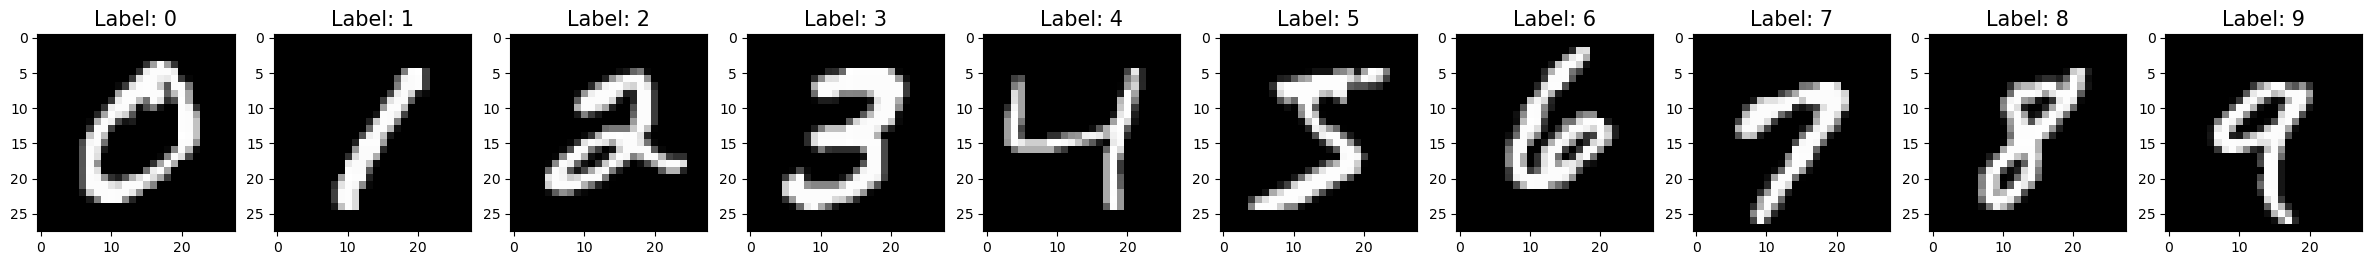

In [54]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(30,30))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=15)

In [55]:
# Checking out the sample data 

for i in range(9):
    print(y_train[i])

5
0
4
1
9
2
1
3
1


In [56]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [57]:
# Checking out the sample data after categorical conversion

for i in range(9):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


**Q: Why is the Label converted into a matrix?**

A: The data is converted into a matrix because of the one-hot encoding of the categorical data. Each row in the matrix corresponds to a label, and the position of the value 1 in the row indicates the class or label number.
Breaking down one of the rows to understand the representation -

One-hot Encoded Data - [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]

The length of the data is same as the class number which is 10 in our case since we are representing digits from 0-9.
Now, the index set with "1" determines the value of the original label. The original label in this example is "5 " and because of that the matrix has "1" in the 6th place (index 5, considering zero-based indexing) , and all other elements are 0.

In [58]:
# Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


**Q: Why is the data divided by 255?**

A: Dividing each pixel value by 255.0 in the context of image data normalization serves the purpose of scaling the pixel values to a range between 0 and 1. The reason behind this lies in the original range of pixel values in common image formats.

In most image formats, including grayscale images like those in the MNIST dataset, pixel values are represented as integers ranging from 0 to 255. A pixel with a value of 0 is typically interpreted as black, while a pixel with a value of 255 is interpreted as white. Intermediate values represent different shades of gray.

## Model Creation - Fully Connected Neural Network

In [59]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Training data 

In [60]:
batch_size = 512
epochs=10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 0s 2ms/step - loss: 0.5939 - accuracy: 0.8299
Epoch 2/10
118/118 [==============================] - 0s 2ms/step - loss: 0.2297 - accuracy: 0.9331
Epoch 3/10
118/118 [==============================] - 0s 2ms/step - loss: 0.1701 - accuracy: 0.9501
Epoch 4/10
118/118 [==============================] - 0s 2ms/step - loss: 0.1352 - accuracy: 0.9607
Epoch 5/10
118/118 [==============================] - 0s 2ms/step - loss: 0.1125 - accuracy: 0.9669
Epoch 6/10
118/118 [==============================] - 0s 2ms/step - loss: 0.0957 - accuracy: 0.9717
Epoch 7/10
118/118 [==============================] - 0s 2ms/step - loss: 0.0833 - accuracy: 0.9752
Epoch 8/10
118/118 [==============================] - 0s 2ms/step - loss: 0.0715 - accuracy: 0.9785
Epoch 9/10
118/118 [==============================] - 0s 2ms/step - loss: 0.0631 - accuracy: 0.9810
Epoch 10/10
118/118 [==============================] - 0s 2ms/step - loss: 0.0564 - accuracy: 0.9824

As we can see, both the loss and accuracy are improving as you progress through the epochs. This is a positive sign, indicating that the neural network is learning to better represent the patterns in out training data.

In [62]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Data Loss: {}, Test Data Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 0s 340us/step - loss: 0.0716 - accuracy: 0.9766
Test Data Loss: 0.07157109677791595, Test Data Accuracy: 0.9765999913215637


In [63]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 0s 310us/step
[[1.56020383e-06 7.11447115e-07 5.22817172e-05 ... 9.99836922e-01
  4.38325259e-07 3.93874370e-06]
 [3.44865725e-07 1.72084779e-04 9.99819815e-01 ... 1.19989094e-08
  8.76961224e-07 1.14785979e-10]
 [2.14072152e-05 9.96740758e-01 1.01914792e-03 ... 1.52360462e-03
  2.33170838e-04 1.30158087e-05]
 ...
 [2.07688436e-10 7.06408043e-09 1.42091794e-09 ... 4.34339472e-06
  9.67756435e-08 5.24175562e-07]
 [3.83547381e-08 2.91206078e-07 2.11109157e-08 ... 1.29635085e-08
  2.38502093e-04 2.76687812e-10]
 [6.83124268e-09 2.77353779e-10 9.42671097e-09 ... 3.76087043e-11
  1.50900092e-08 3.68964165e-11]]
[7 2 1 ... 4 5 6]


### Using this data to make some predictions

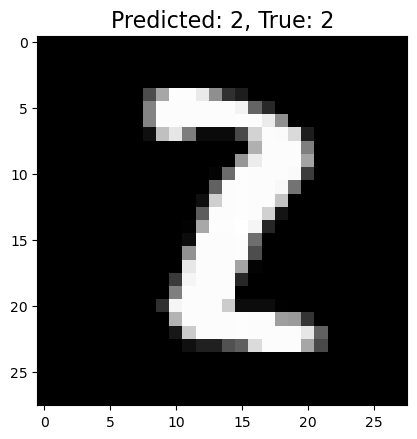

In [64]:
# Single Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

## Confusion Matrix for Validation 

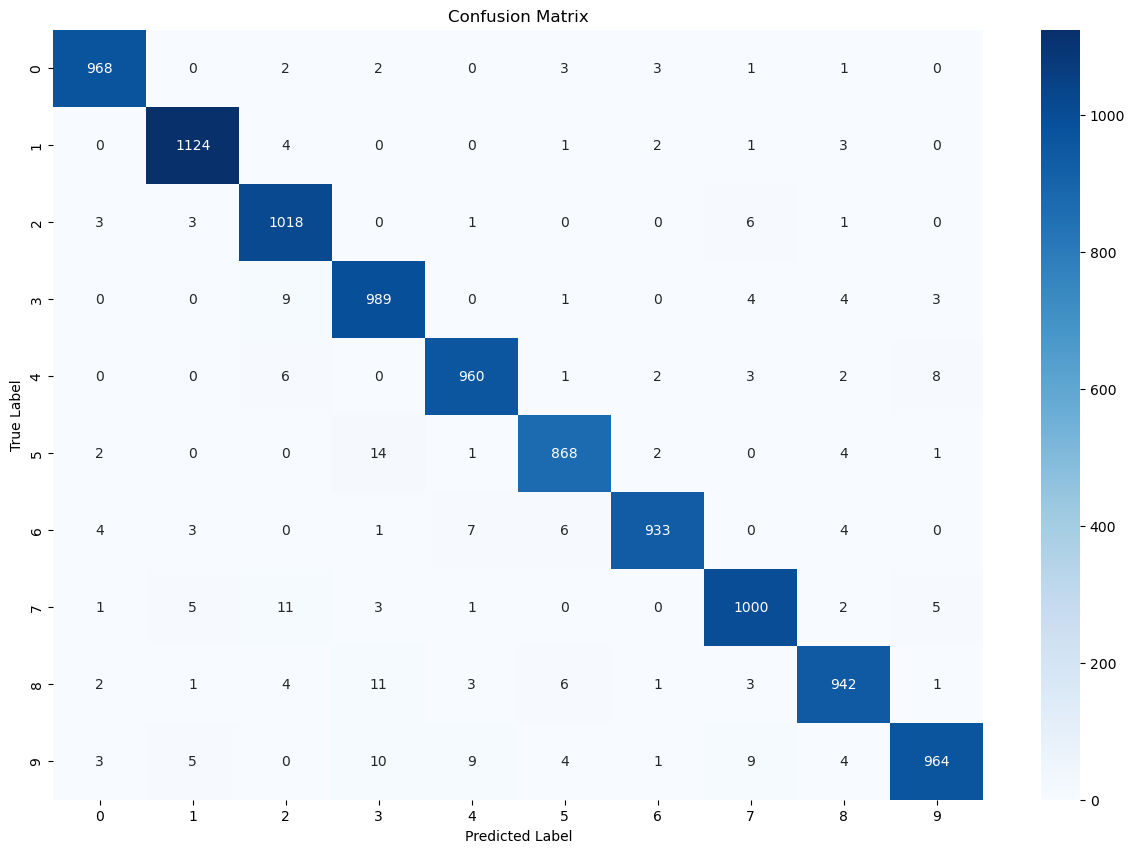

In [65]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

We are calculating a confusion matrix based on the true labels (y_true) and predicted class labels (y_pred_classes) and then visualizes it using a heatmap. 

The confusion matrix is a table that shows the counts of true positive, true negative, false positive, and false negative predictions, allowing a detailed assessment of classification model performance. The heatmap, created using the Seaborn library, uses color intensity to represent the count values, aiding in the quick identification of patterns and areas where the model may be misclassifying certain labels. The x and y-axis labels and the title provide additional context for interpreting the confusion matrix visualization.

Analysis - 

**We can see that the model predicted 1 accurately 1124 times but it also predicted it as "2" 4 times and "5" once.** 

## Investigate Some Errors

In [66]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [67]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # 5 last ones

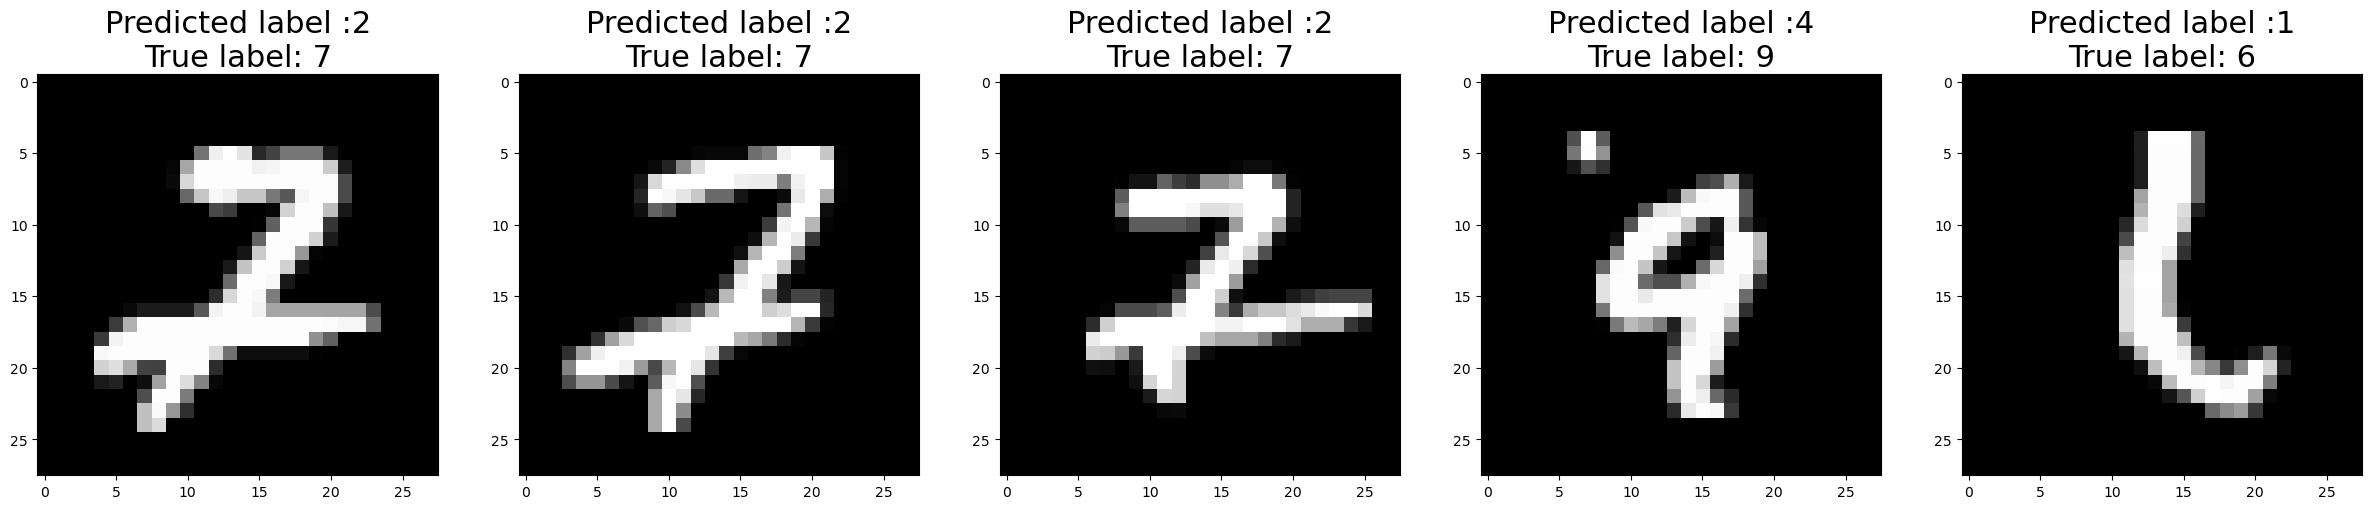

In [68]:
# Show Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)

## Summary - 

**Our Neural network model has an accuracy of 97.6 percent when tested on MNIST dataset. This indicates its capability to precisely identify and categorize handwritten digits, demonstrating its efficiency in performing well on this particular task.** 

References - 

References Notebook - https://www.kaggle.com/code/sheshngupta/tminst-character-recognition-94-4-accuracy

Tutorial - https://medium.com/analytics-vidhya/hello-world-of-computer-vision-mnist-handwritten-digit-classification-a5c28f6276e1

Confusion Matrix - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

Dataset - https://keras.io/api/datasets/

